In [1]:
using LightGraphs
using GraphPlot
using Colors

In [2]:
red = readdlm("zacharykarateclub.dat")
g = Graph()
ultimovertice = Int64(maximum(red))
add_vertices!(g,ultimovertice)
for n in 1:Int64((length(red)/2))
    add_edge!(g,Int64(red[n,1]),Int64(red[n,2]))
end

In [8]:
function community_detection_nback(g::Graph, k::Int)
    #TODO insert check on connected_components
    ϕ = real(nonbacktrack_embedding(g, k))
    if k==2
        c = community_detection_threshold(g, ϕ[1,:])
    else
        c = kmeans(ϕ, k).assignments
    end
    return c
end

function community_detection_threshold(g::SimpleGraph, coords::AbstractArray)
    # TODO use a more intelligent method to set the threshold
    # 0 based thresholds are highly sensitive to errors.
    c = ones(Int, nv(g))
    # idx = sortperm(λ, lt=(x,y)-> abs(x) > abs(y))[2:k] #the second eigenvector is the relevant one
    for i=1:nv(g)
        c[i] = coords[i] > 0 ?  1 : 2
    end
    return c
end


""" Spectral embedding of the non-backtracking matrix of `g`
(see [Krzakala et al.](http://www.pnas.org/content/110/52/20935.short)).
`g`: imput Graph
`k`: number of dimensions in which to embed
return : a matrix ϕ where ϕ[:,i] are the coordinates for vertex i.
Note does not explicitly construct the `non_backtracking_matrix`.
See `Nonbacktracking` for details.
"""
function nonbacktrack_embedding(g::Graph, k::Int)
    B = Nonbacktracking(g)
    λ, eigv, conv = eigs(B, nev=k+1, v0=ones(Float64, B.m))
    ϕ = zeros(Complex64, nv(g), k-1)
    # TODO decide what to do with the stationary distribution ϕ[:,1]
    # this code just throws it away in favor of eigv[:,2:k+1].
    # we might also use the degree distribution to scale these vectors as is
    # common with the laplacian/adjacency methods.
    for n=1:k-1
        v= eigv[:,n+1]
        ϕ[:,n] = contract(B, v)
    end
    return ϕ'
end


nonbacktrack_embedding (generic function with 1 method)

In [18]:
membership = community_detection_nback(g, 2);

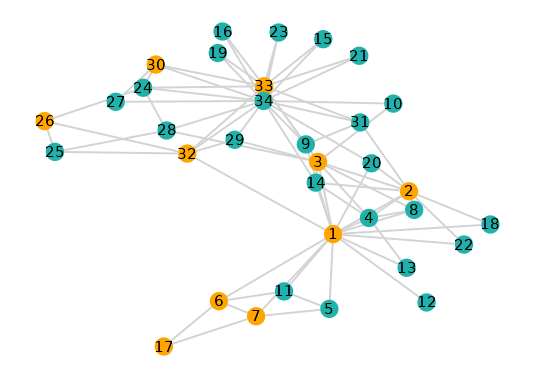

In [11]:
nodecolor = [colorant"lightseagreen", colorant"orange"]
nodefillc = nodecolor[membership]
nodelabel = collect(1:nv(g))
gplot(g, nodefillc=nodefillc, nodelabel=nodelabel)

In [14]:
using RCall
R_kmeans = R"kmeans";

In [15]:
function community_detection_nback(g::Graph, k::Int)
    #TODO insert check on connected_components
    ϕ = real(nonbacktrack_embedding(g, k))
    if k==2
        c = community_detection_threshold(g, ϕ[1,:])
    else
        c = R_kmeans(ϕ, k).assignments
    end
    return c
end

function community_detection_threshold(g::SimpleGraph, coords::AbstractArray)
    # TODO use a more intelligent method to set the threshold
    # 0 based thresholds are highly sensitive to errors.
    c = ones(Int, nv(g))
    # idx = sortperm(λ, lt=(x,y)-> abs(x) > abs(y))[2:k] #the second eigenvector is the relevant one
    for i=1:nv(g)
        c[i] = coords[i] > 0 ?  1 : 2
    end
    return c
end


""" Spectral embedding of the non-backtracking matrix of `g`
(see [Krzakala et al.](http://www.pnas.org/content/110/52/20935.short)).
`g`: imput Graph
`k`: number of dimensions in which to embed
return : a matrix ϕ where ϕ[:,i] are the coordinates for vertex i.
Note does not explicitly construct the `non_backtracking_matrix`.
See `Nonbacktracking` for details.
"""
function nonbacktrack_embedding(g::Graph, k::Int)
    B = Nonbacktracking(g)
    λ, eigv, conv = eigs(B, nev=k+1, v0=ones(Float64, B.m))
    ϕ = zeros(Complex64, nv(g), k-1)
    # TODO decide what to do with the stationary distribution ϕ[:,1]
    # this code just throws it away in favor of eigv[:,2:k+1].
    # we might also use the degree distribution to scale these vectors as is
    # common with the laplacian/adjacency methods.
    for n=1:k-1
        v= eigv[:,n+1]
        ϕ[:,n] = contract(B, v)
    end
    return ϕ'
end

nonbacktrack_embedding (generic function with 1 method)

In [19]:
membership = community_detection_nback(g, 2);

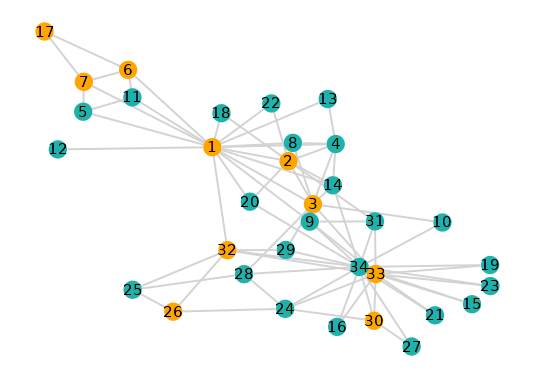

In [17]:
nodecolor = [colorant"lightseagreen", colorant"orange"]
nodefillc = nodecolor[membership]
nodelabel = collect(1:nv(g))
gplot(g, nodefillc=nodefillc, nodelabel=nodelabel)